In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df= pd.read_csv("train_data.csv")

In [38]:
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303
3,de843d67-0ed3-4dfe-af91-78923dc31810,2025.914557,57.014236,1464.561241,41.216368,95.883762,62.872820,1.769396,4.116238,3553.348618,...,0.176038,-0.506675,0.000024,0.000587,0.023851,0.011562,0.011562,2.062848,0.176038,-0.506675
4,ba117ec1-3de8-4da3-a315-4c7716589439,1576.443907,71.274370,619.624143,28.014521,97.524479,15.728281,0.711109,2.475521,2211.796331,...,0.410326,0.208714,-0.000109,-0.000151,0.014282,0.007043,0.007043,2.027828,0.410326,0.208714


In [39]:
df.size

185000

In [40]:
df.shape

(5000, 37)

In [41]:
df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [42]:

columns_to_remove = ['uuid', 'datasetId']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)



In [43]:
# Check for null values in the DataFrame
df.isnull().sum()



VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [44]:
df['condition'].unique()


array(['interruption', 'no stress', 'time pressure'], dtype=object)

In [45]:

condition_mapping = {
    'interruption': 1,
    'no stress': 2,
    'time pressure': 3
}

# Replace the values in the 'condition' column with the assigned numbers
df['condition'] = df['condition'].replace(condition_mapping)



In [46]:
df.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'condition',
       'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

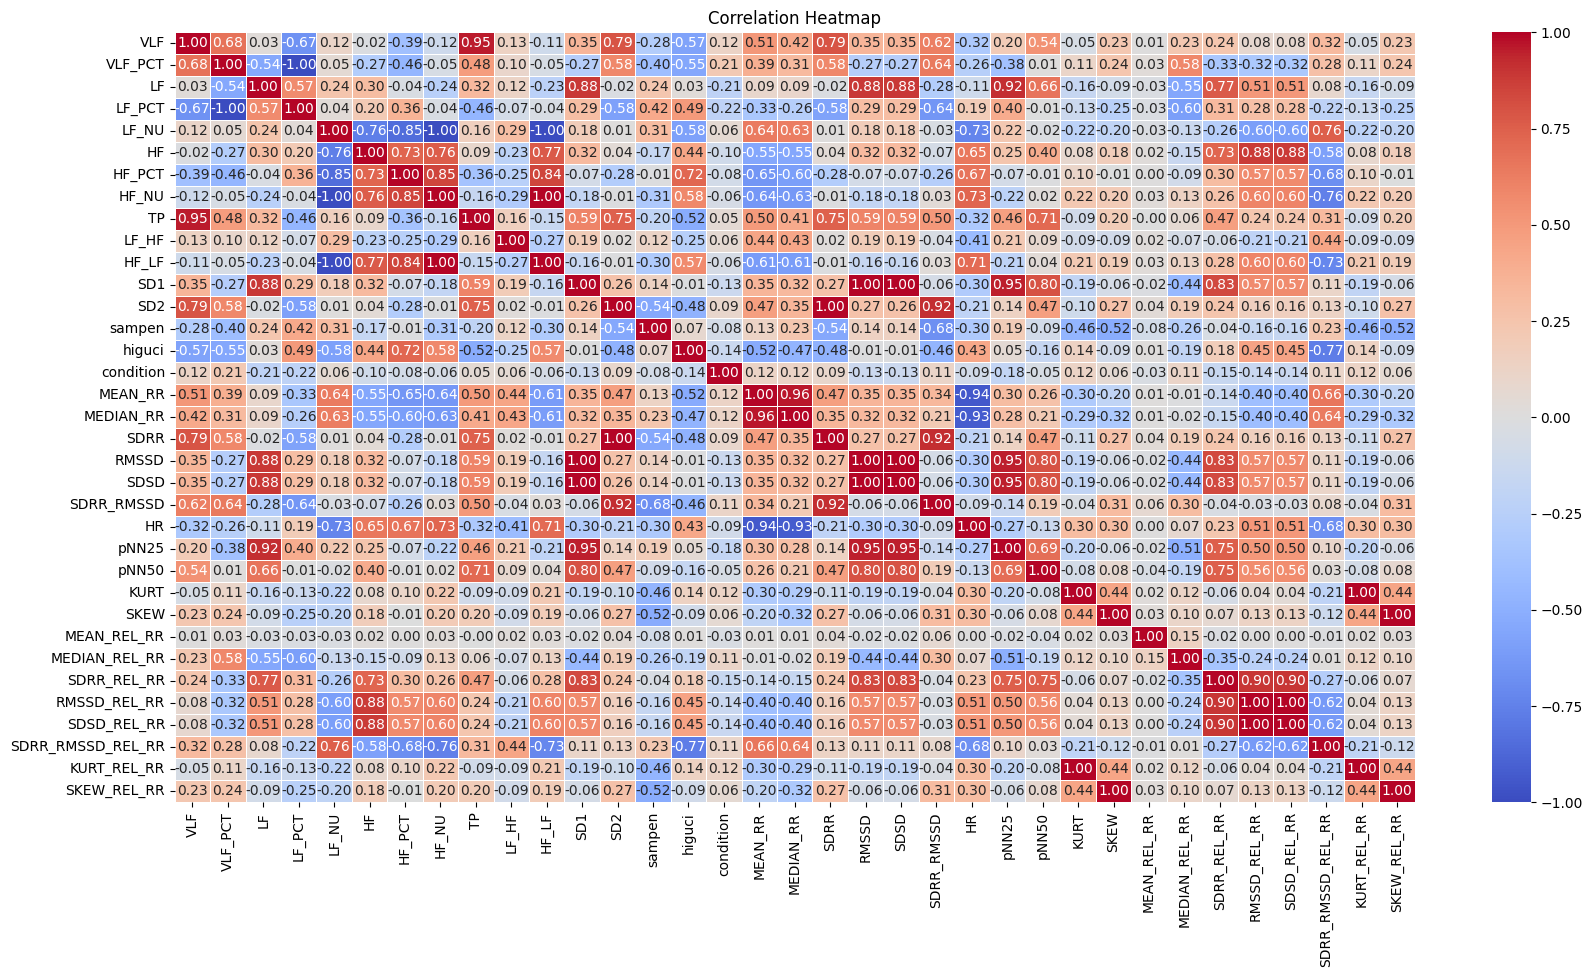

In [47]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')




Root Mean Squared Error (RMSE): 1.390535787293412


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Ridge Regression: {rmse}')


Root Mean Squared Error (RMSE) with Ridge Regression: 1.5034607623363505


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Lasso Regression: {rmse}')

Root Mean Squared Error (RMSE) with Lasso Regression: 2.504240125293208


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.9)
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Elastic Net Regression: {rmse}')

Root Mean Squared Error (RMSE) with Elastic Net Regression: 1.418318992447555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+02, tolerance: 4.456e+01
  model = cd_fast.enet_coordinate_descent(


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Huber Regression
huber_model = HuberRegressor(epsilon=5)
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = huber_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Huber Regression: {rmse}')

Root Mean Squared Error (RMSE) with Huber Regression: 1.3974058677930592


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply RANSAC Regression
ransac_model = RANSACRegressor(random_state=42)
ransac_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ransac_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with RANSAC Regression: {rmse}')

Root Mean Squared Error (RMSE) with RANSAC Regression: 1.795115424053453


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bayesian_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with Bayesian Regression: {rmse}')

Root Mean Squared Error (RMSE) with Bayesian Regression: 1.3914086302344562


In [55]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
X = df[features]
y = df[target]

# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the OMP Regression model
model = OrthogonalMatchingPursuit()

# Train the OMP Regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) with OMP Regression: {rmse}')

Root Mean Squared Error (RMSE) with OMP Regression: 3.4393633415258043


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the XGBoost regression model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.4129340732096723


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the AdaBoost regression model
model = AdaBoostRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 1.7008709818816616


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the Extra Trees regression model
model = ExtraTreesRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.25383346206676904


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the Decision Tree regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 0.7145986744942033


Lowest RMSE: 2.136906850391142 with 1 neighbors


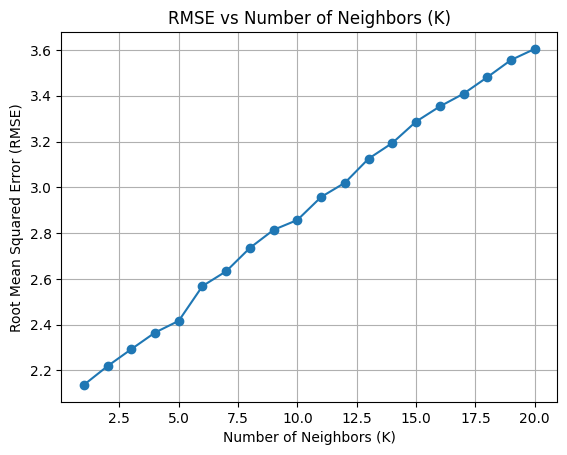

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define a range of values for k (number of neighbors)
k_values = range(1, 21)
rmse_values = []
min_rmse = float('inf')
best_k = None

# Iterate over different values of k
for k in k_values:
    # Initialize the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_values.append(rmse)

    # Update the minimum RMSE and corresponding k value
    if rmse < min_rmse:
        min_rmse = rmse
        best_k = k

# Print the lowest RMSE value and the corresponding number of neighbors
print(f'Lowest RMSE: {min_rmse} with {best_k} neighbors')

# Plotting the graph
plt.plot(k_values, rmse_values, marker='o')
plt.title('RMSE vs Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()



In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
n_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])  # Number of components can be adjusted
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Use linear regression on the principal components
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE) for PCR: {rmse}')


Root Mean Squared Error (RMSE) for PCR: 1.4049582852435651


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np



# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE) for NNN Regression: {rmse}')


Epoch 1/50
113/113 [==============================] - 1s 3ms/step - loss: 3548.6741 - val_loss: 716.8030
Epoch 2/50
113/113 [==============================] - 0s 2ms/step - loss: 384.0970 - val_loss: 259.6929
Epoch 3/50
113/113 [==============================] - 0s 2ms/step - loss: 205.9762 - val_loss: 156.3593
Epoch 4/50
113/113 [==============================] - 0s 2ms/step - loss: 125.4991 - val_loss: 101.8841
Epoch 5/50
113/113 [==============================] - 0s 2ms/step - loss: 83.5123 - val_loss: 73.0389
Epoch 6/50
113/113 [==============================] - 0s 3ms/step - loss: 59.8576 - val_loss: 56.5288
Epoch 7/50
113/113 [==============================] - 0s 2ms/step - loss: 45.3655 - val_loss: 45.2600
Epoch 8/50
113/113 [==============================] - 0s 2ms/step - loss: 36.1053 - val_loss: 37.1055
Epoch 9/50
113/113 [==============================] - 0s 2ms/step - loss: 29.9287 - val_loss: 31.4237
Epoch 10/50
113/113 [==============================] - 0s 2ms/step - loss

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Use PolynomialFeatures to generate polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE) for Polynomial Regression (degree={degree}): {rmse}')


Root Mean Squared Error (RMSE) for Polynomial Regression (degree=2): 0.1435064036183413


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



# Select features and target variable
features = ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
            'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
            'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD',
            'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
            'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
            'KURT_REL_RR', 'SKEW_REL_RR']

target = 'HR'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Use PolynomialFeatures to generate polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Root Mean Squared Error (RMSE) for Polynomial Regression (degree={degree}): {rmse}')

Root Mean Squared Error (RMSE) for Polynomial Regression (degree=3): 0.06527980802284138


The best model is polynomial Regression (degree 3) as it has the lowest RMSE.